# Task I

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


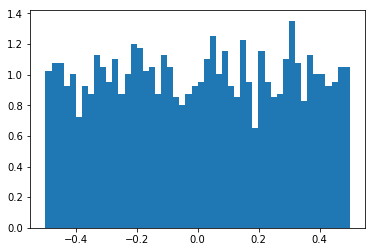

In [2]:
A=diag(rand(2000)-0.5)     # generate diagonal matrix
evA=eigvalsh(A)            # get eigenvalues
hA=hist(evA,50,normed=True)# generate histogram

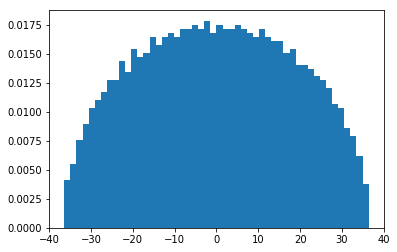

In [3]:
B=rand(2000,2000)-0.5 # generate full random matrix 
                      # with elements uniformly distributed
                      # in the [-0.5,0.5] intervall

B=B+B.T               # symmetrize
evB=eigvalsh(B)       # get eigenvalues
hB=hist(evB,50,normed=True)# generate histogram

In [4]:
from scipy.optimize import curve_fit # getting the fitting algorithm

We will fit a constant and a semicircle

In [5]:
# definition of the constant
def const(x,c):
    return c*ones_like(x)

In [6]:
poptA,pcovA=curve_fit(const,hA[1][:-1],hA[0]) # fitting the constant

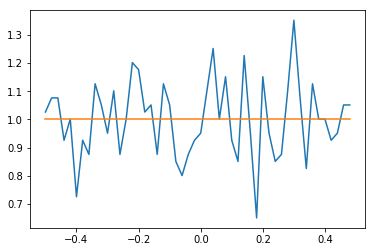

In [7]:
# check how good the fit is
plot(hA[1][:-1],hA[0])
plot(hA[1][:-1],const(hA[1][:-1],*poptA))

In [8]:
#definition of the semicircle
def semic(x,W,C):
    return C*sqrt(W**2-x**2)
# fitting
poptB,pcovB=curve_fit(semic,hB[1][:-1],hB[0],p0=[50,0.1]) # we need to gess the initial parameters
                                                          # for the fitting to go through

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


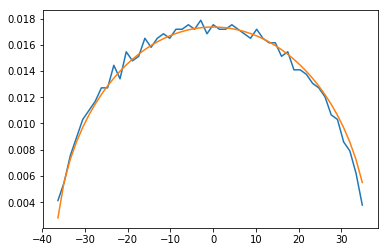

In [9]:
# checking the fit
plot(hB[1][:-1],hB[0])
plot(hB[1][:-1],semic(hB[1][:-1],*poptB))

Make nice figures :)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


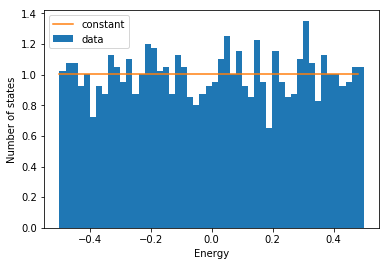

In [10]:
hA=hist(evA,50,normed=True,label='data')
plot(hA[1][:-1],const(hA[1][:-1],*poptA),label='constant')
legend()
xlabel("Energy")
ylabel("Number of states");

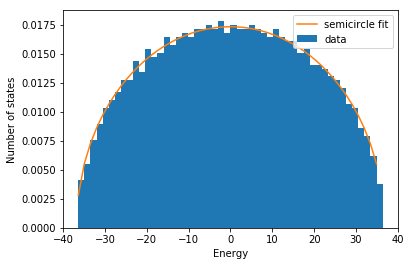

In [11]:
hB=hist(evB,50,normed=True,label='data')
plot(hB[1][:-1],semic(hB[1][:-1],*poptB),label='semicircle fit')
legend()
xlabel("Energy")
ylabel("Number of states");

# Task II

In [12]:
P=diag(randn(2000)) # Poisson

GOE=randn(2000,2000)     # Orthogonal
GOE=GOE+GOE.T

GUE=randn(2000,2000)+1j*randn(2000,2000) # Unitary
GUE=GUE+conj(GUE.T)

In [13]:
from scipy import interpolate # we will need interpolate data

In [14]:
evP = eigvalsh(P)                  # get some eigenvalues
evGOE = eigvalsh(GOE)              # 
evGUE = eigvalsh(GUE)              # 

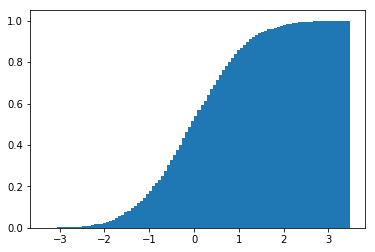

In [15]:
# generate the cumulative distribution of the eigenvalues
# here we use matplotlib's hist
# could use numpy's but it has no built in cumulative histogram ... 
hgP=hist(evP,100,cumulative=True,normed=True) # may need to play with bins

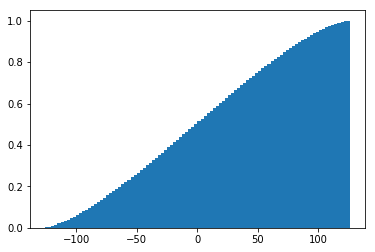

In [16]:
hgGOE=hist(evGOE,100,cumulative=True,normed=True) # may need to play with bins

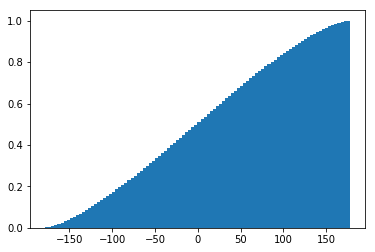

In [17]:
hgGUE=hist(evGUE,100,cumulative=True,normed=True) # may need to play with bins

unfolding the eigenvalues

In [18]:

ipolP=interpolate.interp1d(hgP[1][1:],hgP[0],fill_value=(0,1),bounds_error=False) 
unfolded_evP=ipolP(evP)

ipolGOE=interpolate.interp1d(hgGOE[1][1:],hgGOE[0],fill_value=(0,1),bounds_error=False) 
unfolded_evGOE=ipolGOE(evGOE)

ipolGUE=interpolate.interp1d(hgGUE[1][1:],hgGUE[0],fill_value=(0,1),bounds_error=False) 
unfolded_evGUE=ipolGUE(evGUE)

generating histograms to be used in fittings

In [19]:
# definition of distribution functions to be used
rhoGOE = lambda x,a,b:a*x*exp(-x**2*b)
rhoGUE = lambda x,a,b:a*x**2*exp(-x**2*b)
rhoP   = lambda x,a,b:a*exp(-x*b)
lran=linspace(0,0.0025,1000)

Diagonal matrix has Poisson levelspacing

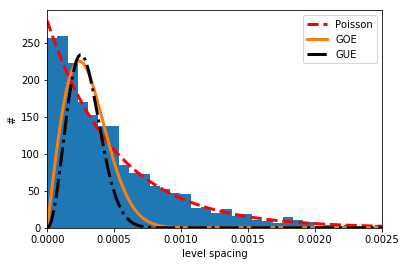

In [20]:
hP=hist(diff(sort(unfolded_evP)),50);
popt,pcov=curve_fit(rhoP,hP[1][:-1],hP[0])
plot(lran,rhoP(lran,*popt),'r--',label='Poisson',lw=3)

popt,pcov=curve_fit(rhoGOE,hP[1][:-1],hP[0])
plot(lran,rhoGOE(lran,*popt),'C1-',label='GOE',lw=3)

popt,pcov=curve_fit(rhoGUE,hP[1][:-1],hP[0])
plot(lran,rhoGUE(lran,*popt),'k-.',label='GUE',lw=3)

xlim(0,0.0025)
legend()
xlabel('level spacing')
ylabel('#');

Symmetric matrix has GOE ($\beta=1$)

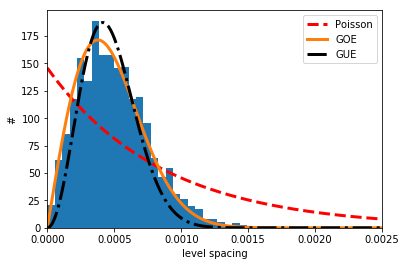

In [21]:
hGOE=hist(diff(sort(unfolded_evGOE)),50);
popt,pcov=curve_fit(rhoP,hGOE[1][:-1],hGOE[0])
plot(lran,rhoP(lran,*popt),'r--',label='Poisson',lw=3)

popt,pcov=curve_fit(rhoGOE,hGOE[1][:-1],hGOE[0])
plot(lran,rhoGOE(lran,*popt),'C1-',label='GOE',lw=3)

popt,pcov=curve_fit(rhoGUE,hGOE[1][:-1],hGOE[0])
plot(lran,rhoGUE(lran,*popt),'k-.',label='GUE',lw=3)

xlim(0,0.0025)
legend()
xlabel('level spacing')
ylabel('#');

Hermitian matrix has GUE ($\beta=2$)

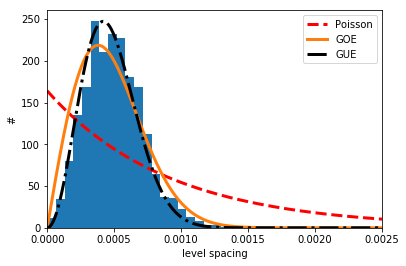

In [22]:
hGUE=hist(diff(sort(unfolded_evGUE)),50);
popt,pcov=curve_fit(rhoP,hGUE[1][:-1],hGUE[0])
plot(lran,rhoP(lran,*popt),'r--',label='Poisson',lw=3)

popt,pcov=curve_fit(rhoGOE,hGUE[1][:-1],hGUE[0])
plot(lran,rhoGOE(lran,*popt),'C1-',label='GOE',lw=3)

popt,pcov=curve_fit(rhoGUE,hGUE[1][:-1],hGUE[0])
plot(lran,rhoGUE(lran,*popt),'k-.',label='GUE',lw=3)

xlim(0,0.0025)
legend()
xlabel('level spacing')
ylabel('#');

# Task III

In [23]:
L=35 # define rectangular sample 
W=20
y,x=meshgrid(range(W),range(L))
x=x.flatten() # generate coordinates
y=y.flatten()
# come up with the shape of the potato 
# lets make two touching disks
inside=((x-W/2)**2+(y-W/2)**2<(W/2)**2)+((x-(L-W/2))**2+(y-W/2)**2<(W/2)**2)

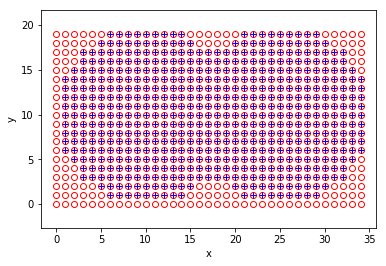

In [24]:
plot(x,y,'o',mec='r',mfc='w',ms=6)
plot(x[inside],y[inside],'b+')

axis('equal');
xlabel('x')
ylabel('y');


In [25]:
# define some helper matrices to be used in hamiltonian construction
idL=eye(L)
idW=eye(W)
odL=diag(ones(L-1),1)
odW=diag(ones(W-1),1)
# define slices of the hamiltonian
h0=4*idW-odW-odW.T
h1=-idW
# build hamiltonian corresponding to red lattice
H=(kron(idL,h0)+kron(odL,h1)+kron(odL,h1).T)
# cut region of interest
Hinside=H[:,inside][inside,:]

In [26]:
va,ve=eigh(Hinside)

In [27]:
from  ipywidgets import *

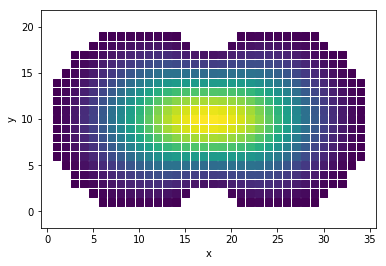

In [28]:
@interact(i=(0,len(va)-1))
def play(i=0):
    #tripcolor(x[inside],y[inside],abs(ve[:,i])**2 )
    scatter(x[inside],y[inside],s=55*ones_like(ve[:,i]),c=abs(ve[:,i])**2,marker='s' )
    axis('equal')
    xlabel('x')
    ylabel('y');

## The biliard


### Non chaotic

In [29]:
L=70 # define rectangular sample 
W=70
y,x=meshgrid(range(W),range(L))
x=x.flatten() # generate coordinates
y=y.flatten()
# come up with the shape of the potato 
# lets make two touching disks
inside_nC=y<1*x
sum(inside_nC) # check dimension

2415

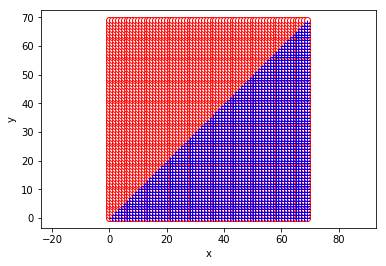

In [30]:
plot(x,y,'o',mec='r',mfc='w',ms=6)
plot(x[inside_nC],y[inside_nC],'b+')

axis('equal');
xlabel('x')
ylabel('y');


In [31]:
# define some helper matrices to be used in hamiltonian construction
idL=eye(L)
idW=eye(W)
odL=diag(ones(L-1),1)
odW=diag(ones(W-1),1)
# define slices of the hamiltonian
h0=4*idW-odW-odW.T
h1=-idW
# build hamiltonian corresponding to red lattice
H=(kron(idL,h0)+kron(odL,h1)+kron(odL,h1).T)
# cut region of interest
Hinside_nC=H[:,inside_nC][inside_nC,:]

In [32]:
ev_nC,vec_nC=eigh(Hinside_nC)
ev_nC=ev_nC[:1000]

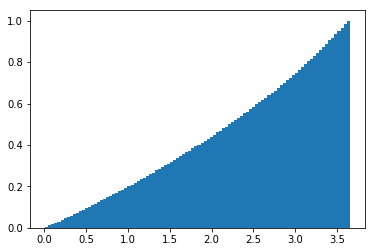

In [33]:
hg_nC=hist(ev_nC,100,cumulative=True,normed=True) # may need to play with bins

ipol_nC=interpolate.interp1d(hg_nC[1][1:],hg_nC[0],fill_value=(0,1),bounds_error=False) 
unfolded_ev_nC=ipol_nC(ev_nC)


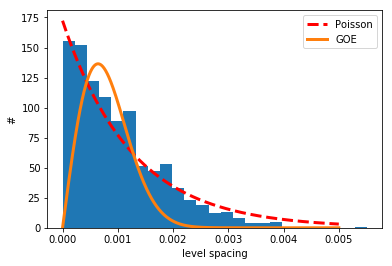

In [34]:
lran=linspace(0,0.005,1000)

h_nC=hist(diff(sort(unfolded_ev_nC)),25);
popt,pcov=curve_fit(rhoP,h_nC[1][:-1],h_nC[0])
plot(lran,rhoP(lran,*popt),'r--',label='Poisson',lw=3)

popt,pcov=curve_fit(rhoGOE,h_nC[1][:-1],h_nC[0])
plot(lran,rhoGOE(lran,*popt),'C1-',label='GOE',lw=3)

legend()
xlabel('level spacing')
ylabel('#');

As one can see the levelspacing distribution of the unfolded spectra is Poisson like.

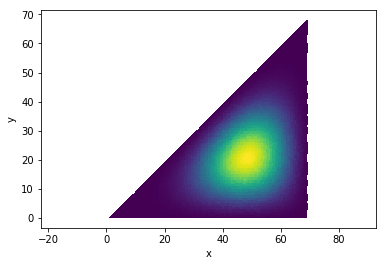

In [35]:
@interact(i=(0,len(va)-1))
def play(i=0):
    tripcolor(x[inside_nC],y[inside_nC],abs(vec_nC[:,i])**2 )
    axis('equal')
    xlabel('x')
    ylabel('y');

### Chaotic

In [36]:
L=120 # define rectangular sample 
W=120
y,x=meshgrid(range(W),range(L))
x=x.flatten() # generate coordinates
y=y.flatten()
# come up with the shape of the potato 
# lets make two touching disks
inside_C=(y<1*x)*(x**2+y**2>(L*0.9)**2)
sum(inside_C)

2546

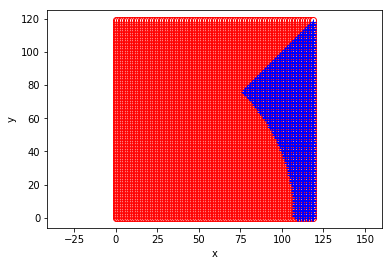

In [37]:
plot(x,y,'o',mec='r',mfc='w',ms=6)
plot(x[inside_C],y[inside_C],'b+')

axis('equal');
xlabel('x')
ylabel('y');


In [38]:
# define some helper matrices to be used in hamiltonian construction
idL=eye(L)
idW=eye(W)
odL=diag(ones(L-1),1)
odW=diag(ones(W-1),1)
# define slices of the hamiltonian
h0=4*idW-odW-odW.T
h1=-idW
# build hamiltonian corresponding to red lattice
H=(kron(idL,h0)+kron(odL,h1)+kron(odL,h1).T)
# cut region of interest
Hinside_C=H[:,inside_C][inside_C,:]

In [39]:
ev_C,vec_C=eigh(Hinside_C)
ev_C=ev_C[:1000]

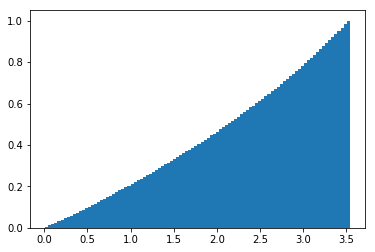

In [40]:
hg_C=hist(ev_C,100,cumulative=True,normed=True) # may need to play with bins

ipol_C=interpolate.interp1d(hg_C[1][1:],hg_C[0],fill_value=(0,1),bounds_error=False) 
unfolded_ev_C=ipol_C(ev_C)


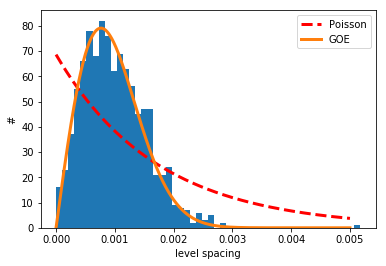

In [41]:
h_C=hist(diff(sort(unfolded_ev_C)),50);
popt,pcov=curve_fit(rhoP,h_C[1][:-1],h_C[0])
plot(lran,rhoP(lran,*popt),'r--',label='Poisson',lw=3)

popt,pcov=curve_fit(rhoGOE,h_C[1][:-1],h_C[0])
plot(lran,rhoGOE(lran,*popt),'C1-',label='GOE',lw=3)
legend()
xlabel('level spacing')
ylabel('#');

As one can see the levelspacing distribution of the unfolded spectra is Poisson like.

In [42]:
@interact(i=(0,len(va)-1))
def play(i=0):
    #tripcolor(x[inside_C],y[inside_C],abs(vec_C[:,i])**2 )
    scatter(x[inside_C],y[inside_C],s=55*ones_like(vec_C[:,i]),c=abs(vec_C[:,i])**2,marker='s' )
    axis('equal')
    xlabel('x')
    ylabel('y');

interactive(children=(IntSlider(value=0, description='i', max=569), Output()), _dom_classes=('widget-interact',))